In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [44]:
traindata = pd.read_csv("data/train.csv", index_col='Id')
x_train = traindata.drop(columns=["Category"])
y_train = traindata.Category

testdata = pd.read_csv("data/test.csv", index_col='Id')

# Анализ данных

## Количественный анализ

In [45]:
traindata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 90000 entries, 0 to 89999
Columns: 301 entries, x_1 to Category
dtypes: float64(301)
memory usage: 207.4 MB


In [46]:
testdata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 9999
Columns: 300 entries, x_1 to x_300
dtypes: float64(300)
memory usage: 23.0 MB


In [47]:
traindata.sample(5)

,x_1,x_2,x_3,x_4,x_5,x_6,x_7,x_8,x_9,x_10,...,x_292,x_293,x_294,x_295,x_296,x_297,x_298,x_299,x_300,Category
Id,,,,,,,,,,,,,,,,,,,,,
67272,-1.51,-1.23,-0.01,-0.45,0.42,-0.38,-1.11,-1.24,-0.00,-1.55,...,1.44,-0.00,-0.17,-0.00,0.13,-0.00,0.82,-0.75,-0.00,-1.0
18895,-0.72,0.45,0.02,0.13,1.41,0.21,1.60,-1.70,0.00,0.61,...,-1.23,0.00,0.67,0.02,1.31,0.06,0.27,-0.02,0.02,1.0
71547,0.26,-1.60,0.00,-1.15,-0.66,-0.19,0.06,-1.41,0.02,-0.29,...,-0.24,0.04,-0.19,0.00,0.28,0.00,-0.08,-0.04,0.04,-1.0
67470,-1.51,1.37,0.02,-0.01,0.05,-0.41,0.38,1.79,0.04,-0.84,...,-0.94,0.06,-0.37,0.00,0.28,0.08,1.26,1.21,0.02,1.0
5206,1.49,-1.46,-0.04,0.16,0.90,0.22,0.56,0.58,-0.02,0.59,...,0.80,-0.01,0.09,-0.01,-0.91,-0.03,-1.07,-0.39,-0.04,-1.0


In [48]:
np.unique(traindata.Category)

array([-1.,  1.])

Количесвенная информация:
1. Выборка описывается n = 300 признаками
2. Все признаки - вещественные
3. Количество объектов:
    1. Train - 90000
    2. Test - 10000
4. Мощность множества ответов - 2.
5. Тип задачи - бинарная классификация


## Качественный анализ

Начнем с простого - как признаки коррелируют друг с другом.

<AxesSubplot:>

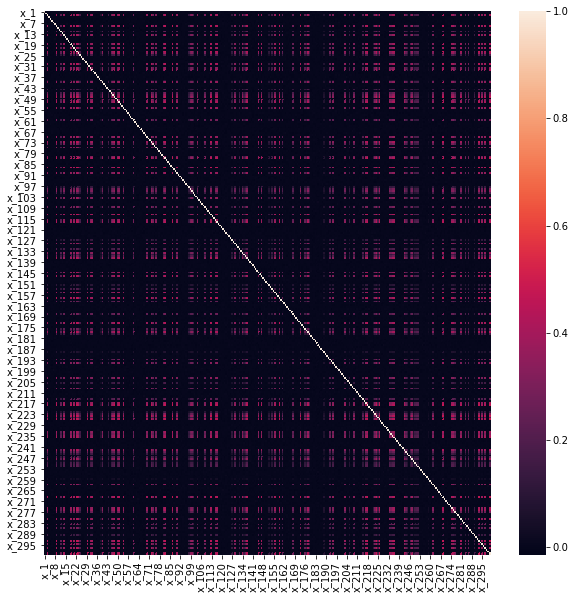

In [49]:
plt.figure(figsize=(10, 10))

sns.heatmap(x_train.corr())

Рассмотрим небольшую часть этой матрицы:

<AxesSubplot:>

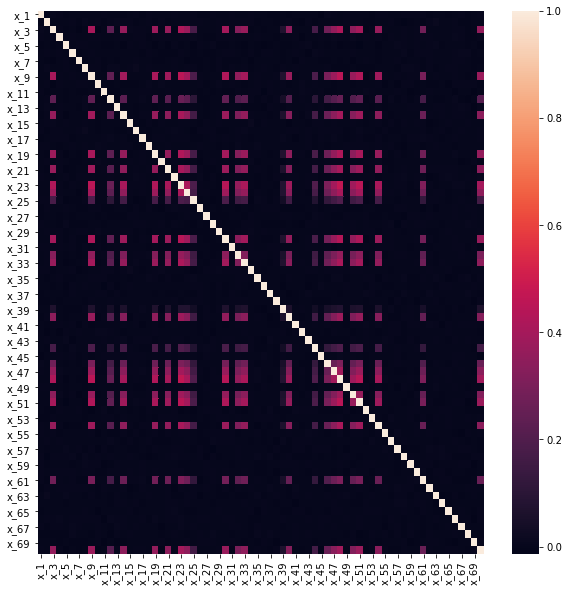

In [51]:
plt.figure(figsize=(10, 10))

sns.heatmap(x_train.iloc[:, :70].corr(), )

Теперь оценим влияние признаков на ответ. Для этого рассмотрим корреляцию с вектором ответов - однородна ли она?

In [78]:
ans_cov = y_train.dot(x_train) - x_train.mean() * y_train.mean()
ans_corr = ans_cov / np.sqrt(x_train.var() * y_train.var()) / 90000

ans_cov.shape

(300,)

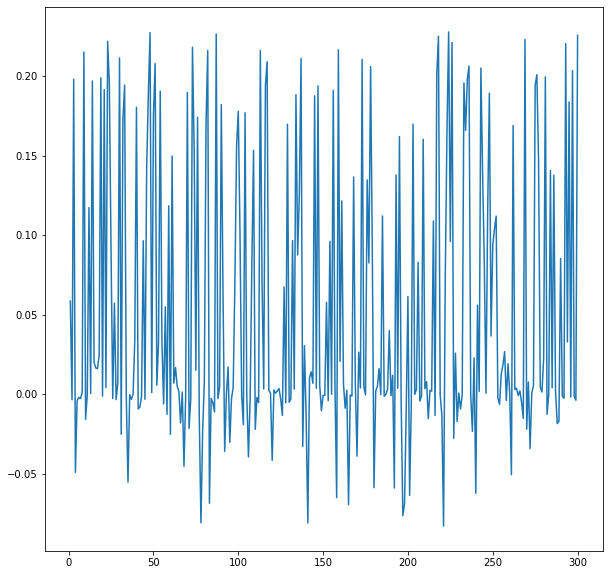

In [79]:
plt.figure(figsize=(10, 10))
plt.plot(range(1, 301), ans_corr)

Взглянем также и на некоторые статистики признаков:

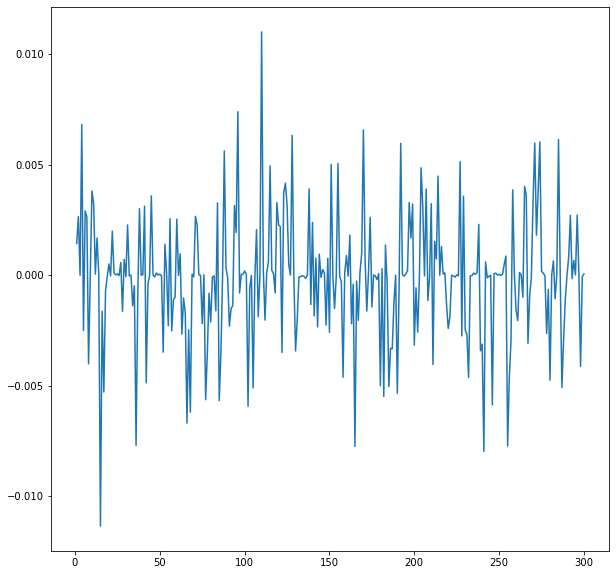

In [84]:
plt.figure(figsize=(10, 10))
plt.plot(range(1, 301), x_train.mean())

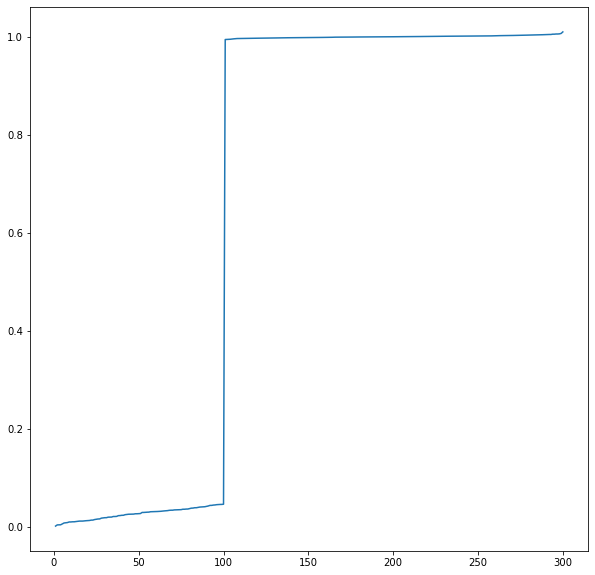

In [86]:
plt.figure(figsize=(10, 10))
plt.plot(range(1, 301), np.sort(x_train.std()))

In [91]:
indecies_sorted = np.argsort(x_train.std())
x_train.std()[indecies_sorted[:101]]

x_259    0.002123
x_249    0.004548
x_39     0.004660
x_189    0.004780
x_152    0.006590
           ...   
x_300    0.046138
x_218    0.046244
x_226    0.046333
x_224    0.046728
x_268    0.994035
Length: 101, dtype: float64

Взглянем на матрицу корреляции у первой сотни признаков:

<AxesSubplot:>

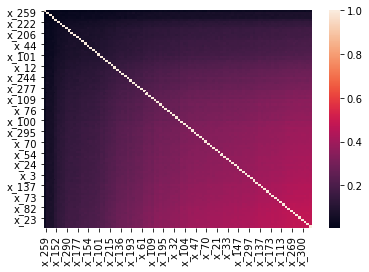

In [93]:
sns.heatmap(traindata.iloc[:, indecies_sorted[:100]].corr())

<AxesSubplot:>

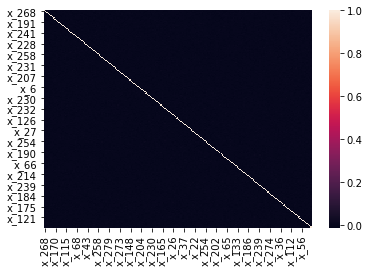

In [94]:
sns.heatmap(traindata.iloc[:, indecies_sorted[100:]].corr())

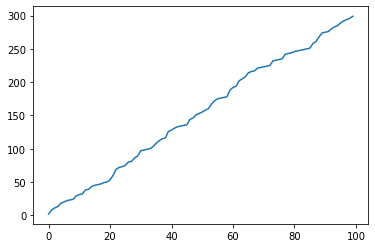

In [97]:
plt.plot(sorted(indecies_sorted[:100]))

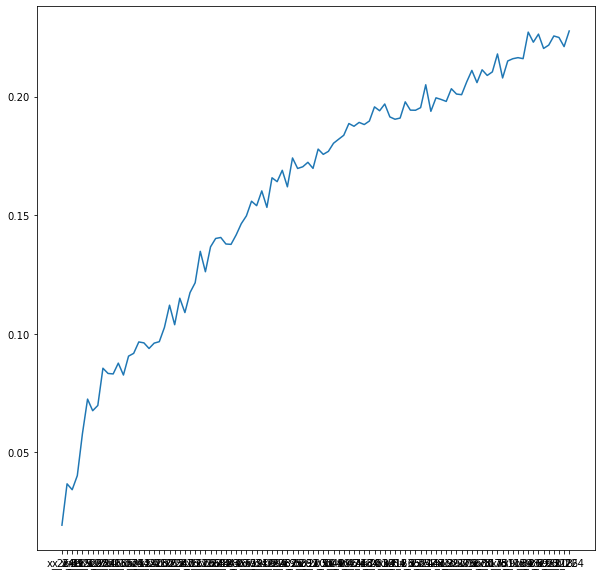

In [100]:
plt.figure(figsize=(10, 10))
plt.plot(ans_corr[indecies_sorted[:100]])

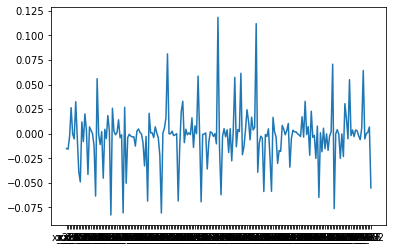

In [101]:
plt.plot(ans_corr[indecies_sorted[100:]])

Теперь попробуем обучить какой-нибудь бейзлайн, чтобы посмотреть, какое из подмножество признаков более предпочтительно для модели.

In [127]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

X_100 = traindata.iloc[:, indecies_sorted[90:100]]
y_100 = y_train

X_train, X_val, Y_train, Y_val = train_test_split(X_100, y_100, test_size=0.2)

print(X_100.shape, y_100.shape)

model = XGBClassifier()
model.fit(X_train, Y_train)



pred = model.predict(X_val)
print(classification_report(Y_val, pred))

(90000, 10) (90000,)
[16:23:48] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

        -1.0       0.75      0.75      0.75      8969
         1.0       0.75      0.75      0.75      9031

    accuracy                           0.75     18000
   macro avg       0.75      0.75      0.75     18000
weighted avg       0.75      0.75      0.75     18000



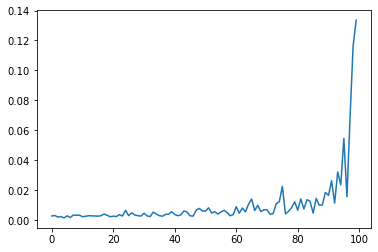

In [118]:
plt.plot(model.feature_importances_)

In [119]:
X_200 = traindata.iloc[:, indecies_sorted[100:]]
y_200 = y_train

print(X_200.shape, y_200.shape)

X_train, X_val, Y_train, Y_val = train_test_split(X_200, y_200, test_size=0.2)

model = XGBClassifier()
model.fit(X_train, Y_train)



pred = model.predict(X_val)
print(classification_report(Y_val, pred))

(90000, 200) (90000,)


/home/serg/miniconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:20:58] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

        -1.0       0.65      0.64      0.65      9056
         1.0       0.64      0.64      0.64      8944

    accuracy                           0.64     18000
   macro avg       0.64      0.64      0.64     18000
weighted avg       0.64      0.64      0.64     18000



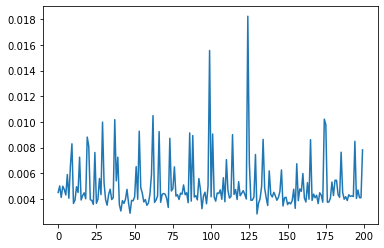

In [120]:
plt.plot(model.feature_importances_)

In [125]:
X_train, X_val, Y_train, Y_val = train_test_split(x_train, y_train, test_size=0.2)

model = XGBClassifier()
model.fit(X_train, Y_train)



pred = model.predict(X_val)
print(classification_report(Y_val, pred))

[16:22:57] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

        -1.0       0.91      0.91      0.91      9052
         1.0       0.91      0.91      0.91      8948

    accuracy                           0.91     18000
   macro avg       0.91      0.91      0.91     18000
weighted avg       0.91      0.91      0.91     18000

